In [1]:
from pymotifcluster.clusterwindow import *
import random
import time


# Dummy Example

testing_windows_base = [
"DSSASPEVVSDLPPSSPKGSPDRHDPSTSSP",
"VREQAVWALGNVAGDSPKCRDLVLSYGAMTP",
"LTSPIPRASVITNQNSPLSSRATRRTSISSG",
"VTPCKGSGDRSLGLTSPIPRASVITNQNSPL",
"AIKASSLSKEGLLFGSPKLSGGSSLYGKLQQ",
"GSFRKNLDTKDAIISSPKLMESGSGKLPVFE",
"SSIASVPITDTTHVKSETGSPRHSSSAKMDE",
"SVPITDTTHVKSETGSPRHSSSAKMDETNGR",
"GSLSKSPSFDWGEDVSPNIPLEKLLVYRLNV",
"DMSSIDGKETSRSGGSPNRAELRKRLSAAEE",
"FKSVFTEDLDPPETESESDSPKHSEEHEHPE",
"SVFTEDLDPPETESESDSPKHSEEHEHPEQE",
"FTEDLDPPETESESDSPKHSEEHEHPEQEHP",
"TGRLSPQTFTSSPSLSPSSSSGGSSFMARYA",
"SPQTFTSSPSLSPSSSSGGSSFMARYAMESS",
"PQTFTSSPSLSPSSSSGGSSFMARYAMESSK",
"NLPGNPDPEAEVIALSPKTLMATNRFLCEIC",
"SPRFSRQRTSPPSLHSPLRSLKEPKRQLIPQ",
"ESAASESGEKADEGRSQVDGSTEQSPKLESA",
"ESGEKADEGRSQVDGSTEQSPKLESASSTEP",
]


In [3]:

testing_windows = []
testing_windows.extend(testing_windows_base)
#testing_windows.extend([ invert_sequence(x) for x in testing_windows_base ])

testing_windows.extend([ shuffle_sequence(x) for x in testing_windows_base*10 ])

mycolours = ['g']*len(testing_windows_base)
mycolours.extend(['r']*(len(testing_windows) - len(testing_windows_base)))

foo = nmer_knn(testing_windows, nmer_size=3, k = 4)

In [5]:
G = knn_to_graph(foo, testing_windows)

colour = mycolours
labelname='Sequence'

pos = nx.spring_layout(G)

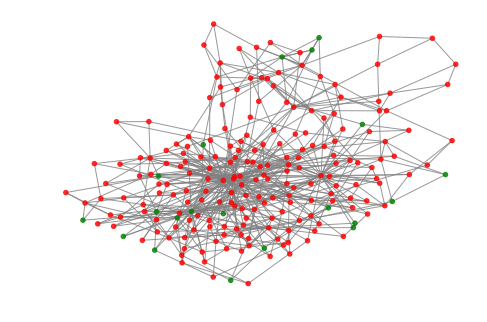

In [7]:
%matplotlib inline
nx.draw(G, pos, node_color = colour,edge_color = 'gray', font_size=12, with_labels=False, node_size = 20, alpha = 0.8)


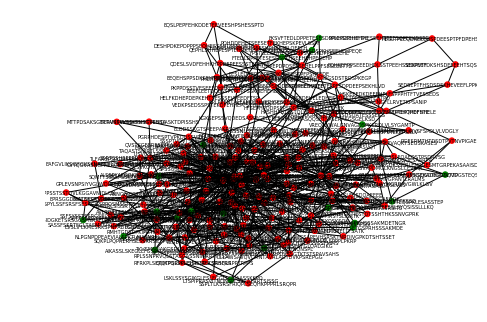

In [8]:
%matplotlib inline
nx.draw(G, pos, node_color = colour, labels = nx.get_node_attributes(G, labelname), font_size=5, with_labels=True, node_size = 30)



(array([173.,  16.,   3.,   2.,   3.,   1.,   0.,   1.,   0.,   1.]),
 array([ 3.,  7., 11., 15., 19., 23., 27., 31., 35., 39., 43.]),
 <a list of 10 Patch objects>)

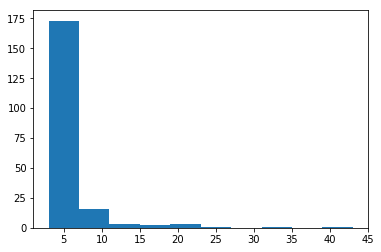

In [9]:
import matplotlib.pyplot as plt
plt.hist([ x[1] for x in G.degree() if x[0] not in range(20) ])

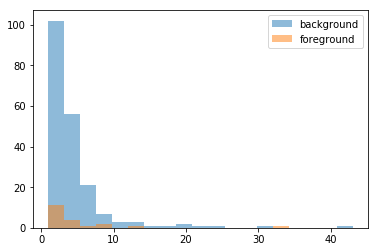

In [10]:
background = [ x[1] for x in G.degree() if x[0] not in range(20) ]
foreground = [ x[1] for x in G.degree() if x[0] in range(20) ]

bins = np.linspace(1, max(max(background), max(background)), 20)

plt.hist(background, bins, alpha=0.5, label='background')
plt.hist(foreground, bins, alpha=0.5, label='foreground')
plt.legend(loc='upper right')
plt.show()

In [12]:
distances = Build_blosum_distance_dict(testing_windows, verbose=False)

In [14]:
len(distances.data)

220

In [16]:
closest = distances.closest_neighbors()